1.Creating, Reading and Writing/Создание, прочтение и написание.
Подключение бибилиотеки.

In [4]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random as rand

2.DataFrame. There are two core objects in pandas: the DataFrame and the Series. A DataFrame is a table. It contains an array of individual entries, each of which has a certain value. Each entry corresponds to a row (or record) and a column.We are using the pd.DataFrame() constructor to generate these DataFrame objects. The syntax for declaring a new one is a dictionary whose keys are the column names (Bob and Sue in this example), and whose values are a list of entries. This is the standard way of constructing a new DataFrame, and the one you are most likely to encounter.

In [ ]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']})

,Bob,Sue
0,I liked it.,Pretty good.
1,It was awful.,Bland.


3. We can use different type of index.

In [ ]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']}, index=['first','second'])

,Bob,Sue
first,I liked it.,Pretty good.
second,It was awful.,Bland.


4.What is series?A Series is, in essence, a single column of a DataFrame.

In [ ]:
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

4.Exploring Bayes theorem for classification:

$x_i \in X_{train} $
$y_i \in Classes$

 $P(y_i=C_k|x_i)=\frac{P(x_i|y_i=C_k)P(C_k)}{P(x_i)}$

 Ну $P(C_k)$ мы можем посчитать, как $\frac{|{ y_i\in Classes|y_i=C_k} |}{|Classes|}$

 $P(x_i|y_i=C_k)$ - Можно симулировать, как нормальное распределение(или любое другое подходящее задаче), подсчитав по входным данным среднее и дисперсию.
 $P(x_i)$ - можно не считать.
 ну и если взять $x_i \in X_{new}$, то  предсказание будет таким: $y_i=\underset{y_i}{\operatorname{argmax}} (P(x_i|y_i=C_k)P(C_k))$

5.Creating simple Dataset for classification by Pandas.

In [9]:
 class_A=[(rand.uniform(20,30),rand.uniform(0,10))for i in range(20)]+[(rand.uniform(24,29),rand.uniform(2,8))for i in range(25)]
 class_B=[(rand.uniform(0,10),rand.uniform(20,30))for i in range(20)]+[(rand.uniform(2,5),rand.uniform(24,27))for i in range(25)]
 class_C=[(rand.uniform(8,23),rand.uniform(6,25))for i in range(20)]+[(rand.uniform(12,15),rand.uniform(12,18))for i in range(25)]
 Classes=[class_A,class_B,class_C]

In [10]:
Table_A=pd.DataFrame({"X":[i[0] for i in class_A],"Y":[i[1] for i in class_A],"Class":['A'for i in class_A]})
Table_B=pd.DataFrame({"X":[i[0] for i in class_B],"Y":[i[1] for i in class_B],"Class":['B'for i in class_B]})
Table_C=pd.DataFrame({"X":[i[0] for i in class_C],"Y":[i[1] for i in class_C],"Class":['C'for i in class_C]})

Table_All= pd.concat([Table_A, Table_B,Table_C], axis=0)
Table_All

,X,Y,Class
0,20.501907,8.847780,A
1,27.680909,6.615064,A
2,24.031770,3.333717,A
3,27.042852,3.554595,A
4,23.063678,9.612476,A
...,...,...,...
40,12.471359,15.314941,C
41,12.054757,12.127649,C
42,13.727016,14.380669,C
43,12.847719,15.523530,C


6.Creating Diagrams by SeaBorn.


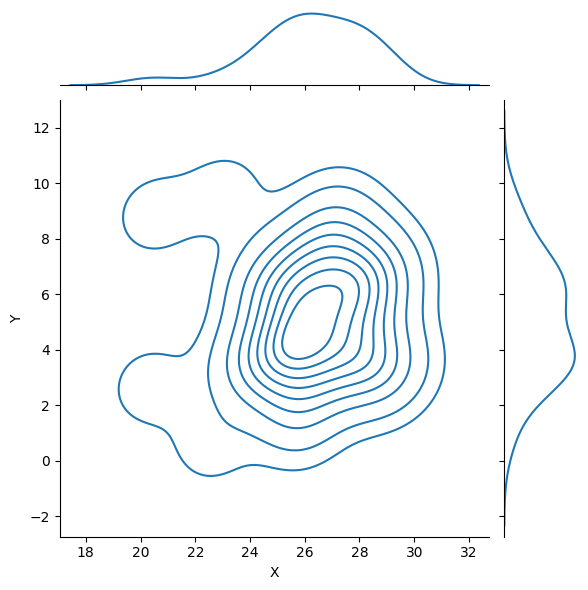

In [11]:
sns.jointplot(x=Table_A['X'], y=Table_A['Y'], kind="kde")

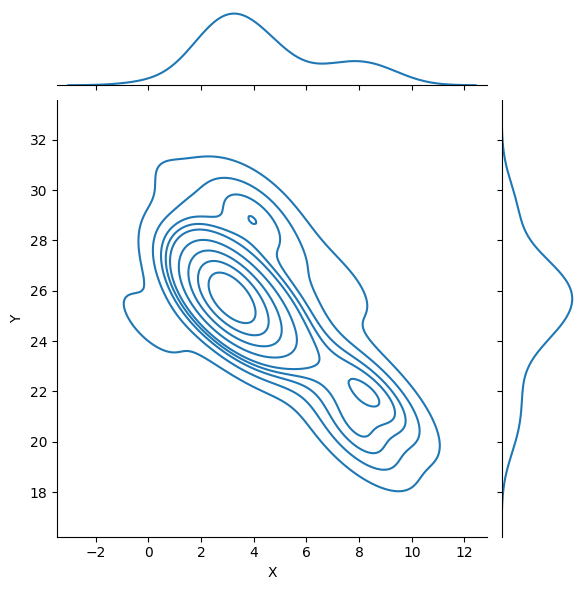

In [12]:
sns.jointplot(x=Table_B['X'], y=Table_B['Y'], kind="kde")

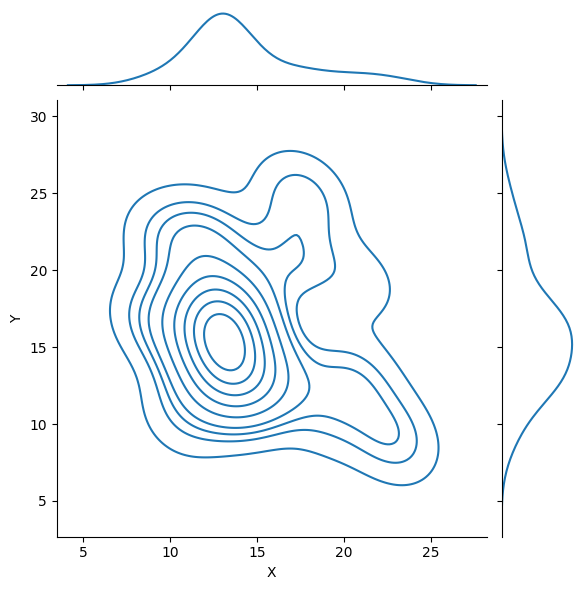

In [13]:
sns.jointplot(x=Table_C['X'], y=Table_C['Y'], kind="kde")

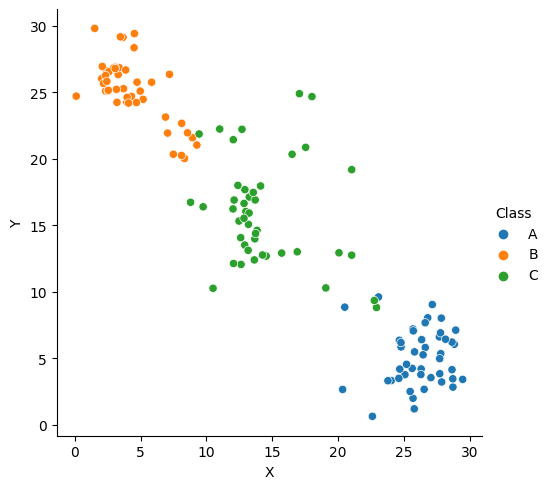

In [14]:
sns.relplot(data=Table_All, x="X", y="Y", hue="Class")

8.Function for imitation Normal Distribution.
$P(x_i|y_i=C_k)\sim\mathcal{N}(M,\sigma^2)$

In [ ]:
def Expect(Class):
  return sum([i[0] for i in Class])/len(Class),sum([i[1] for i in Class])/len(Class)
def Dispersion(Class,Expect_):
  M=Expect_[0]**2,Expect_[1]**2
  return Expect([(i[0]**2-M[0],i[1]**2-M[1]) for i in Class])
def Normal_d(M,D,x):
  e=2.718281828459
  pi=3.14159265359
  return 1/(2*pi*D)**0.5*e**(-(x-M)**2/(2*D))


9.Finding the argument of the max probability.
$y_i=\underset{y_i}{\operatorname{argmax}} (P(x_i|y_i=C_k)P(C_k))$

In [ ]:

def Max_arg(coord):
  Expectes=[Expect(i) for i in Classes]
  Dispersions=[Dispersion(Classes[i],Expectes[i]) for i in range(3)]
  m=0
  jj=-1
  p=1/3 # probability of  any classes
  prob=[]
  for i in range(3):
     p_i=1
     for j in range(2):
        p_i*=Normal_d(Expectes[i][j],Dispersions[i][j],coord[j])
     prob.append(p_i*p)
     if m<p_i*p:
        jj=i
        m=p_i*p   #numerator of Bayes rool maximization
  print(prob)
  return jj+1
coord=[float(i) for i in input().split()]
print(Max_arg(coord))

4 26
[2.059746502911441e-44, 0.010047463953143277, 1.5018133673528888e-07]
2
